# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 1.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [1]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [3]:
data = pd.read_csv('train.csv', index_col=0)
data.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [4]:
# Сразу заменим Nan на среднее в нужных колонках
# По итогу без этого точность лучше, так что не используем
def nan_to_mean(df, col):
    mean = df[col].mean(skipna = True)
    print(col, mean)
    df[col].fillna(mean, inplace = True)

In [5]:
# for col in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
#     nan_to_mean(data, col)

In [6]:
data = data.sample(frac=1)
train, test = np.split(data, [int(.7 * len(data))])
train

/home/lefm/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
345,0,2,"Fox, Mr. Stanley Hubert",male,36.00,0,0,229236,13.0000,NaN,S
307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,17421,110.8833,NaN,C
693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.00,0,0,347071,7.7750,NaN,S
198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.00,0,1,4579,8.4042,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
797,1,1,"Leader, Dr. Alice (Farnham)",female,49.00,0,0,17465,25.9292,D17,S
440,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.00,0,0,C.A. 18723,10.5000,NaN,S


Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [7]:
features_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
target_column = 'Survived'  # Целевой признак

def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [8]:
train_features, train_target = get_features_and_target(train)
test_features, test_target = get_features_and_target(test)

train_features.head(), train_target.head()

(             Pclass     Sex   Age  SibSp  Parch      Fare
 PassengerId                                              
 345               2    male  36.0      0      0   13.0000
 307               1  female   NaN      0      0  110.8833
 693               3    male   NaN      0      0   56.4958
 247               3  female  25.0      0      0    7.7750
 198               3    male  42.0      0      1    8.4042,
 PassengerId
 345    0
 307    1
 693    1
 247    0
 198    0
 Name: Survived, dtype: int64)

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно. 

*Не забывайте про информативность и эстетичность графиков.*

In [9]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Survived / Died Count')]

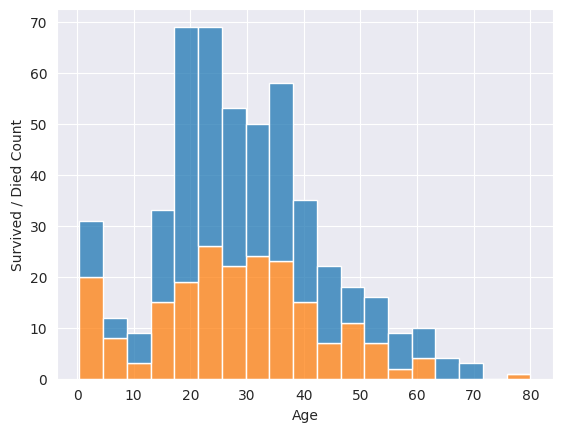

In [10]:
# Зависимость выживаемости от возраста
age_hist = sns.histplot(train_features, x = 'Age', hue = train_target, multiple = 'stack', legend = False)
age_hist.set(xlabel = 'Age', ylabel = 'Survived / Died Count')

[Text(0.5, 0, "Ticket's class"),
 Text(0, 0.5, 'Survived / Died Count'),

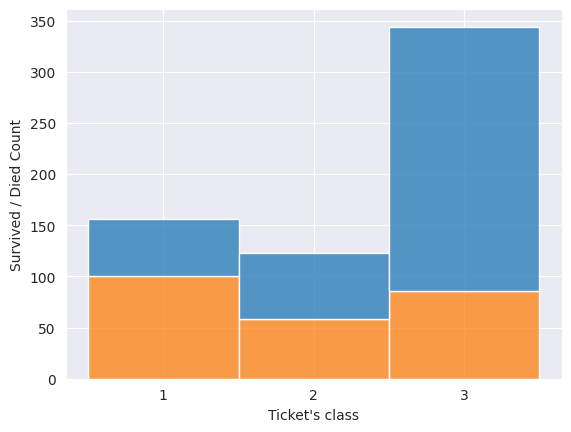

In [11]:
# Зависимость выживаемости от класса пассажира
p_class_hist = sns.histplot(train_features, x = 'Pclass',
                            hue = train_target, multiple = 'stack', bins = [1, 2 ,3, 4],
                            legend = False, discrete = True, pthresh = 0.6)
p_class_hist.set(xlabel = 'Ticket\'s class', ylabel = 'Survived / Died Count', xticks = [1, 2, 3])


[Text(0.5, 0, 'Sex'), Text(0, 0.5, 'Survived / Died Count')]

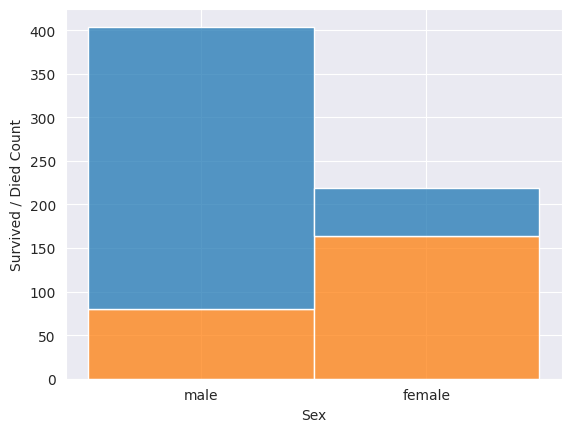

In [12]:
# Зависимость выживаемости от пола
sex_hist = sns.histplot(train_features, x = 'Sex',
                            hue = train_target, multiple = 'stack',
                            legend = False, pthresh = 0.6)
sex_hist.set(xlabel = 'Sex', ylabel = 'Survived / Died Count')

[Text(0.5, 0, 'Sibling and Spouses Count'),
 Text(0, 0.5, 'Survived / Died Count')]

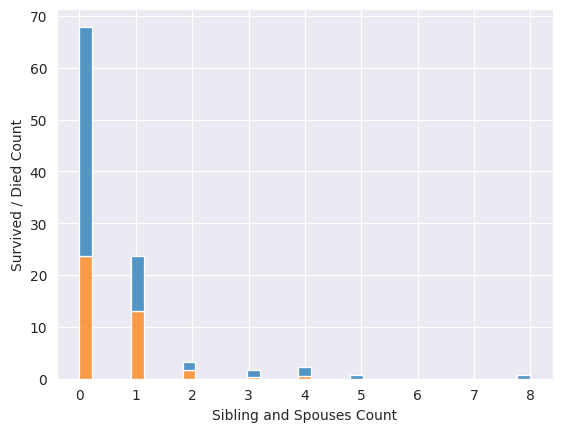

In [13]:
# Зависимость выживаемости от количества сиблингов и партнеров на борту

sib_cnt_hist = sns.histplot(train_features, x = 'SibSp',
                            hue = train_target, multiple = 'stack',
                            legend = False, pthresh = 0.6, stat = 'percent')
sib_cnt_hist.set(xlabel = 'Sibling and Spouses Count', ylabel = 'Survived / Died Count')

[Text(0.5, 0, 'Parch Count'), Text(0, 0.5, 'Survived / Died Count')]

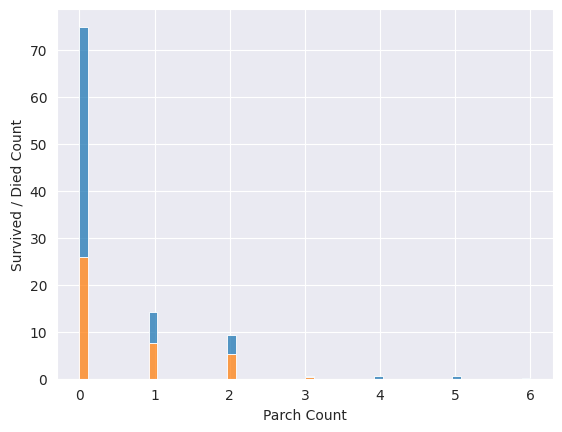

In [14]:
# Зависимость выживаемости от количества родителей/детей на борту

sib_cnt_hist = sns.histplot(train_features, x = 'Parch',
                            hue = train_target, multiple = 'stack',
                            legend = False, pthresh = 0.6, stat = 'percent')
sib_cnt_hist.set(xlabel = 'Parch Count', ylabel = 'Survived / Died Count')

[Text(0.5, 0, 'Fare'), Text(0, 0.5, 'Survived / Died Count'), (0.0, 130.0)]

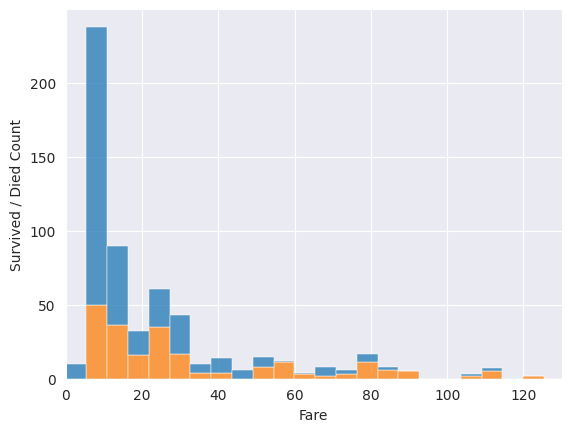

In [15]:
# Зависимость выживаемости от стоимости билета, ограничено сверху ценой в 130 для большей наглядности.
age_hist = sns.histplot(train_features, x = 'Fare', hue = train_target, multiple = 'stack', legend = False)
age_hist.set(xlabel = 'Fare', ylabel = 'Survived / Died Count', xlim = (0, 130))

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи. 

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [16]:
def find_nearest_points(a: np.ndarray, b: np.ndarray, k: int) -> np.ndarray:
    d = ((b[:, :, np.newaxis] - a.T[np.newaxis, :, :]) ** 2).sum(axis=1)
    return (np.argsort(d) + 1)[:, 0 : k]

In [17]:
def knn(features, train_features, train_target, k=1):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    на основе обучающего набора данных train_features, train_target.
    Возвращает pandas.Series с теми же индексами, что и у features.
    Число k -- количество соседей.
    '''    
    # Насчитываем k ближайших соседей
    k_nearest_neighs = find_nearest_points(train_features.to_numpy(), features.to_numpy(), k)
    nearest_target = []
    
    # Идем по ближайшим  соседям каждой точки из features,
    # находим самое частое и его целевой признак кладем в nearest_target
    for i in range(len(k_nearest_neighs)):
        cur_knn_target = [train_target.iloc[index - 1] for index in k_nearest_neighs[i]]
        nearest_target.append(max(set(cur_knn_target), key = cur_knn_target.count))
    
    predicted = pd.Series(nearest_target, index = features.index)
    return predicted

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`. 

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Тк age_max_val ~= 80, fare_max_val ~= 500,
То хорошо бы нормировать эти признаки, чтобы они
вносили примерно равный вклад в "минимизацию расстояния"
Метрика -- евклидово расстояние в кубе [0,1]^k

In [18]:
def normalize(df):
    for column in df.columns:
        min_val = min(list(df[column]))
        max_val = max(list(df[column]))
        df.loc[column] = pd.Series([(x - min_val) / max_val for x in df[column]], index = df.index)

In [19]:
def knn_only_age_and_fare(features, train_features, train_target, k=1):
    cut_features = features[['Age', 'Fare']]
    cut_train_features = train_features[['Age', 'Fare']]
    normalize(cut_features)
    normalize(cut_train_features)
    return knn(cut_features, cut_train_features, train_target, k)


Как меняется результат классификации при другом количестве соседей? Рассмотрите хотя бы три различных нечетных значения количества соседей.

In [20]:
for k in [1, 3, 5, 7, 9]:
    predicted = knn_only_age_and_fare(test_features, train_features, train_target, k)
    accuracy = 0.0
    for index in test_target.index:
        accuracy += (predicted[index] == test_target[index])
    accuracy /= len(predicted)
    print('k =', k, ': accuracy =', accuracy)

/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[column] = pd.Series([(x - min_val) / max_val for x in df[column]], index = df.index)
/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[column] = pd.Series([(x - min_val) / max_val for x in df[column]], index = df.index)
/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.

k = 1 : accuracy = 0.6592592592592592
k = 3 : accuracy = 0.6370370370370371
k = 5 : accuracy = 0.6592592592592592
k = 7 : accuracy = 0.6703703703703704
k = 9 : accuracy = 0.674074074074074


Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы? 

Строить классификатор с другими признаками при этом не нужно.

Так как все признаки числовые(пол можно считать bool), то их тоже можно было бы отнормировать и учитывать при поиске соседей.
Ясно, что у разных признаков разный "вклад" в выживаемость, а в обычном евклидовом расстоянии с нормировкой все признаки равнозначны.



#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

**Дерево 1:**

 Если класс -- третий, то умер, иначе смотрим на количество родителей/детей -- больше или не больше 0.

**Дерево 2:**

Судя по графикам -- большинство женщин выжило, а большинство мужчин погибло.

Реализуйте полученные деревья по шаблону

In [21]:
def tree1(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    pclass = features['Pclass'].apply(lambda pclass: pclass != 3)
    parch = features['Parch'].apply(lambda parch: parch > 0)
    predicted = pclass & parch    
    return predicted

In [22]:
def tree2(features):
    '''
    Предсказание целевого признака для данных features -- pandas-таблица данных.
    Возвращает pandas.Series с теми же индексами, что и у features.
    '''
    predicted = features['Sex'].apply(lambda sex: int(sex == 'female'))
    return predicted


#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

...

Реализуйте данный критерий по шаблону

In [23]:
def criteria(target, predicted):
    '''
    Вычисление критерия качества для предсказания predicted, 
    если истинные значения -- target.
    Возвращает одно вещественное число.
    '''
    accuracy = 0.0
    for index in target.index:
        accuracy += (predicted[index] == target[index])
    accuracy /= len(predicted)
    return  accuracy

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [24]:
print("KNN:", criteria(test_target, knn_only_age_and_fare(test_features, train_features, train_target, k = 7)))
print("Tree 1:", criteria(test_target, tree1(test_features)))
print("Tree 2:", criteria(test_target, tree2(test_features)))



KNN: 0.6703703703703704
Tree 1: 0.667910447761194
Tree 2: 0.7947761194029851


/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[column] = pd.Series([(x - min_val) / max_val for x in df[column]], index = df.index)
/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[column] = pd.Series([(x - min_val) / max_val for x in df[column]], index = df.index)
/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[column] = pd.Series([(x - min_val) / max_val for x in df[column]], index = df.index)
/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[column] = pd.Series([(x - min_val) / max_val for x in df[column]], index = df.index)
/tmp/ipykernel_10977/3684083270.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.

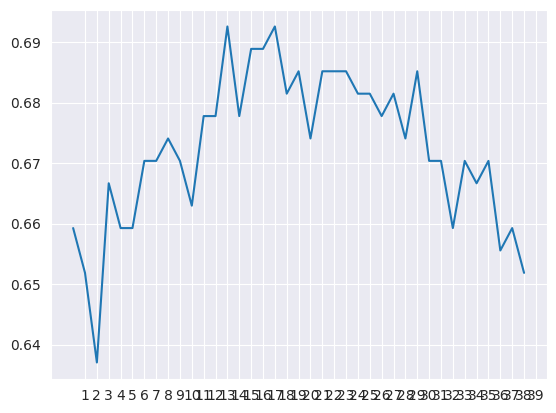

In [25]:
accuracies = [criteria(test_target, knn_only_age_and_fare(test_features, train_features, train_target, k)) for k in range(1, 40)]
plt.figure()
plt.xticks(np.arange(1, 40, 1.0))
plt.plot(accuracies)
plt.show()

Относительно слабый рост(или вообще падение) при четных k обусловено, что при равном количестве представителей среди соседей мы выбираем какой-то
заранее зафиксированный один вариант, что, очевидно, не всегда работает.
Так же ясно, что при увеличении k точность увеличивается, по крайней мере при маленьких k.


#### 6. Выводы

Можно сделать вывод о том, что в данной задаче более эффективными являются деревья, так как некоторые признаки очень хорошо предсказывают
выживаемость(например пол, класс билета), а KNN, пытаясь учесть только возраст и цену, не очень точен, тк как минимум не учитывает пол,
да и судя по графикам возраст имеет значение только в своих крайних точках(дети и старики).